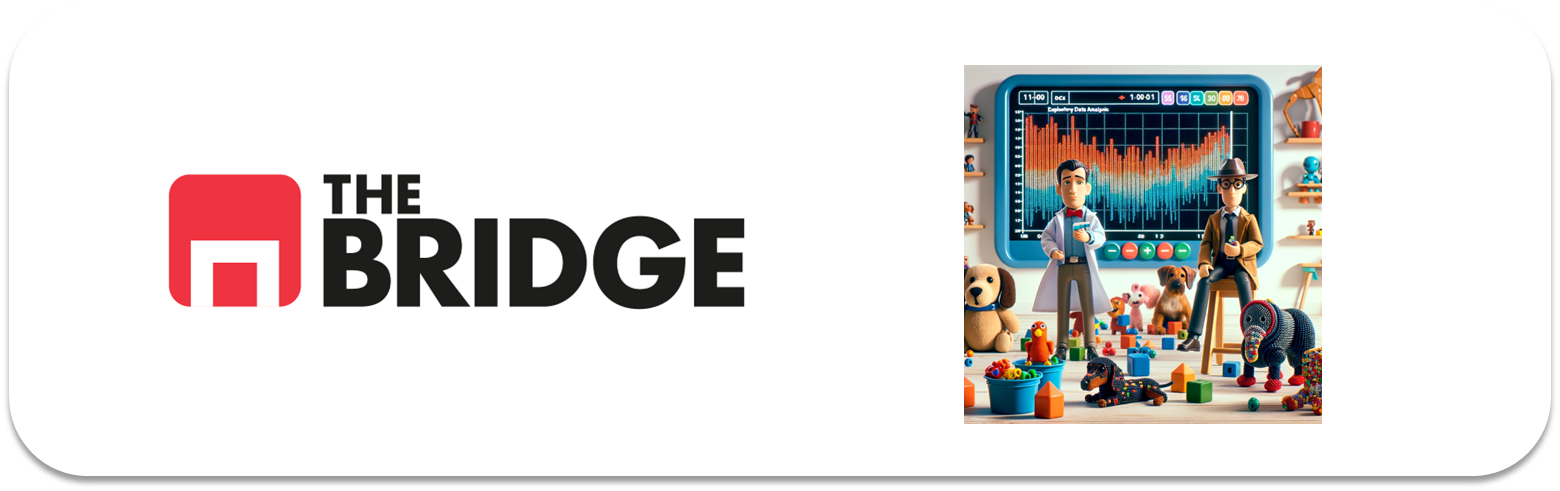

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind
from bootcampviztools import plot_categorical_numerical_relationship, plot_categorical_relationship_fin, plot_combined_graphs, plot_grouped_boxplots, plot_grouped_histograms, pinta_distribucion_categoricas, grafico_dispersion_con_correlacion


In [30]:
pip install scipy

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.8 kB 165.2 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.8 kB 327.7 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 360.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/44.5 MB 2.3 MB/s eta 0:00:20
   ---------------------------------------- 0.2/44.5 MB 2.4 MB/s eta 0:00:19
   ---------------------------------------- 0.3/44.5 MB 2.5 MB/s eta 0:00:18
   ---------------------------------------- 0.4/44.5 MB 2.5 MB/s eta 0:00:18
    --------------------------------------- 0.6/44.5 MB 2.7 MB/s eta 0:00:17
    --------------------------------------- 0.7/44.5 MB 2.7 MB/s eta 0:00:17
    --------------------------------------- 0.9/44.5 MB 2.9 MB/s eta 0:00:16
    --


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [3]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [4]:
df_titanic = df_titanic.drop(columns=["deck", "survived", "pclass", "embarked"])

In [5]:
df_titanic

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [6]:
#Sumamos las dos columnas de parch y sibsp para ponerlo todo en una nueva columna llamada family_members
df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]

#eliminamos las columnas sumadas y dejamos solo la nueva
df_titanic = df_titanic.drop(columns=["parch", "sibsp"])

In [7]:
df_titanic

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [8]:
#primero queremos meter en una variable el valor moda de la columna embark_town
moda_embark_town = df_titanic["embark_town"].mode()[0]

#ahora pedimos que nos sustituya los nulos que existen por el valor de moda
df_titanic["embark_town"].fillna(moda_embark_town, inplace=True)

C:\Users\Guillem\AppData\Local\Temp\ipykernel_15408\3804798536.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic["embark_town"].fillna(moda_embark_town, inplace=True)


In [9]:
#Verificamos que no queden nulos dentro de la columna trabajada
print(df_titanic["embark_town"].isnull().sum())

0


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [10]:
#es importante hacerlo teniendo en cuenta la columna who ya que si coge los valores nulos de age de lo que tenia que ser 
#un niño tal vez podemos ponerle 30 años a una fila perteneciente a un niño

#primero de todo calculamos la media para cada uno de los grupos de who
media_edad_who = df_titanic.groupby('who')['age'].mean()

def generar_edad_nulos(row):
    if pd.isnull(row['age']):
        return media_edad_who[row['who']]
    else:
        return row['age']

df_titanic['age'] = df_titanic.apply(generar_edad_nulos, axis=1)



In [11]:
#comprobamos que no haya ningún nulo en la columna de age
print(df_titanic['age'].isnull().sum())


0


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [14]:
#ejercicio 1
# Términos absolutos
absolute_survival = df_titanic.groupby('who')['alive'].value_counts().unstack().fillna(0)
print(absolute_survival)

# Términos relativos
relative_survival = df_titanic.groupby('who')['alive'].value_counts(normalize=True).unstack().fillna(0)
print(relative_survival)

# Relación entre sexo y supervivencia
contingency_sex = pd.crosstab(df_titanic['sex'], df_titanic['alive'])
chi2_sex, p_sex, _, _ = chi2_contingency(contingency_sex)
print(f"Chi2: {chi2_sex}, p-value: {p_sex}")

# Relación entre ser adulto/niño y supervivencia
contingency_who = pd.crosstab(df_titanic['who'], df_titanic['alive'])
chi2_who, p_who, _, _ = chi2_contingency(contingency_who)
print(f"Chi2: {chi2_who}, p-value: {p_who}")





alive   no  yes
who            
child   34   49
man    449   88
woman   66  205
alive        no       yes
who                      
child  0.409639  0.590361
man    0.836127  0.163873
woman  0.243542  0.756458
Chi2: 260.71702016732104, p-value: 1.1973570627755645e-58
Chi2: 283.923050324233, p-value: 2.2227620817798914e-62


Las mujeres en términos absolutos son las que más sobreviven. También los niños que casi un 60% de ellos sobrevive. 
Podemos detectar que hay una relación significativa entre el sexo y la supervivencia y tambien entre ser adulto/niño y la supervivencia

In [16]:
#ejercicio 2
# Términos absolutos
absolute_survival_class = df_titanic.groupby('class')['alive'].value_counts().unstack().fillna(0)
print(absolute_survival_class)

# Términos relativos
relative_survival_class = df_titanic.groupby('class')['alive'].value_counts(normalize=True).unstack().fillna(0)
print(relative_survival_class)

# Relación entre clase y supervivencia
contingency_class = pd.crosstab(df_titanic['class'], df_titanic['alive'])
chi2_class, p_class, _, _ = chi2_contingency(contingency_class)
print(f"Chi2: {chi2_class}, p-value: {p_class}")



alive    no  yes
class           
First    80  136
Second   97   87
Third   372  119
alive         no       yes
class                     
First   0.370370  0.629630
Second  0.527174  0.472826
Third   0.757637  0.242363
Chi2: 102.88898875696056, p-value: 4.549251711298793e-23


Se puede ver claramente que ser de primera clase te daba más probabilidades de supervivencia que ser de 2a o de 3a.
Hay una relación signficativa entre la ciudad de embarque y la supervivencia. 

In [18]:
#ejercicio 3
# Términos absolutos
absolute_survival_city = df_titanic.groupby('embark_town')['alive'].value_counts().unstack().fillna(0)
print(absolute_survival_city)

# Términos relativos
relative_survival_city = df_titanic.groupby('embark_town')['alive'].value_counts(normalize=True).unstack().fillna(0)
print(relative_survival_city)

# Relación entre ciudad de embarque y supervivencia
contingency_city = pd.crosstab(df_titanic['embark_town'], df_titanic['alive'])
chi2_city, p_city, _, _ = chi2_contingency(contingency_city)
print(f"Chi2: {chi2_city}, p-value: {p_city}")

alive         no  yes
embark_town          
Cherbourg     75   93
Queenstown    47   30
Southampton  427  219
alive              no       yes
embark_town                    
Cherbourg    0.446429  0.553571
Queenstown   0.610390  0.389610
Southampton  0.660991  0.339009
Chi2: 25.964452881874784, p-value: 2.3008626481449577e-06


En términos absolutos, southampton tiene el mayor numero de supervivientes pero el que tiene mayor porcentaje de supervivencia por ciudad de embarque es la ciudad de Cherbourg. 
Existe una relación significativa entre ciudad de embarque y supervivencia. 

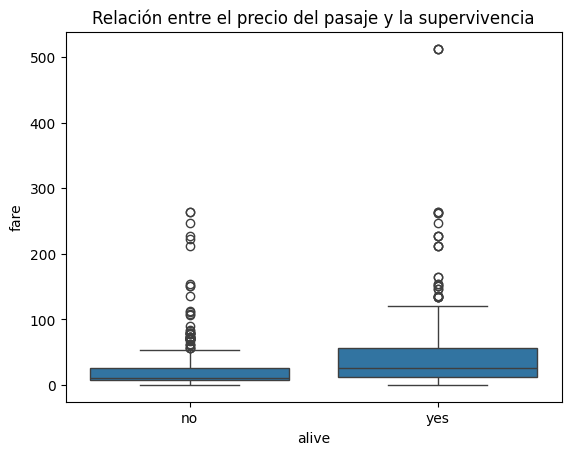

T-statistic: 7.939191660871055, p-value: 6.120189341924198e-15


In [19]:
#ejercicio 4
# Visualización de la relación entre el precio del pasaje y la supervivencia
sns.boxplot(x='alive', y='fare', data=df_titanic)
plt.title('Relación entre el precio del pasaje y la supervivencia')
plt.show()

# Prueba t para la diferencia en el precio del pasaje entre los que sobrevivieron y los que no
fare_survived = df_titanic[df_titanic['alive'] == 'yes']['fare']
fare_not_survived = df_titanic[df_titanic['alive'] == 'no']['fare']
t_stat, p_value = ttest_ind(fare_survived, fare_not_survived, nan_policy='omit')
print(f"T-statistic: {t_stat}, p-value: {p_value}")

Hay una relación de que las personas que pagaron más pudieron sobrevivir, es muy probable que se deba a que los de primera clase que pagaron más debian tener los salvavidas más cerca. 

In [20]:
#ejercicio 5
# Pasajeros que no pagaron el billete
no_fare_passengers = df_titanic[df_titanic['fare'] == 0]
print(no_fare_passengers)

# Pasajero que más pagó
highest_fare_passenger = df_titanic.loc[df_titanic['fare'].idxmax()]
print(highest_fare_passenger)

      sex        age  fare   class  who  adult_male  embark_town alive  alone  \
179  male  36.000000   0.0   Third  man        True  Southampton    no   True   
263  male  40.000000   0.0   First  man        True  Southampton    no   True   
271  male  25.000000   0.0   Third  man        True  Southampton   yes   True   
277  male  33.173123   0.0  Second  man        True  Southampton    no   True   
302  male  19.000000   0.0   Third  man        True  Southampton    no   True   
413  male  33.173123   0.0  Second  man        True  Southampton    no   True   
466  male  33.173123   0.0  Second  man        True  Southampton    no   True   
481  male  33.173123   0.0  Second  man        True  Southampton    no   True   
597  male  49.000000   0.0   Third  man        True  Southampton    no   True   
633  male  33.173123   0.0   First  man        True  Southampton    no   True   
674  male  33.173123   0.0  Second  man        True  Southampton    no   True   
732  male  33.173123   0.0  

Los pasajeros que no pagaron son todo hombre entre 30-40 años y que además solo sobrevivió uno al accidente. Es muy probable que estos que no pagaron fueran tripulación trabajadora del barco.

Según lo que nos sale la persona que pago más era una mujer de 35 años que pago 512.3292 por el pasaje

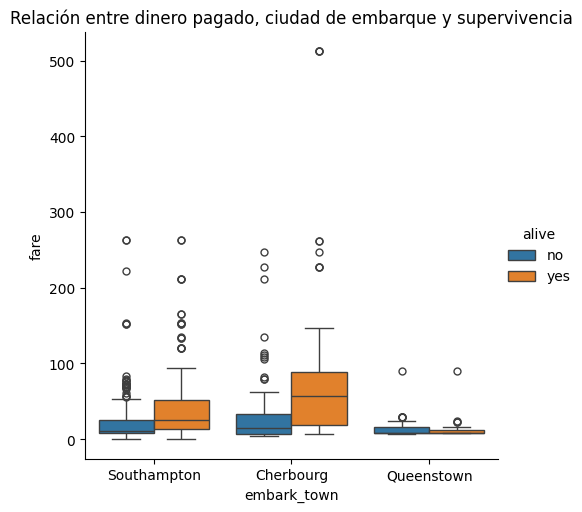

In [28]:
#ejercicio 6
# Visualización de la relación entre dinero pagado, ciudad de embarque y supervivencia
sns.catplot(x='embark_town', y='fare', hue='alive', kind='box', data=df_titanic)
plt.title('Relación entre dinero pagado, ciudad de embarque y supervivencia')
plt.show()

Si nos fijamos donde más supervivencia hay es en la ciudad de embarque de CHerbourg. Además también vemos que es donde se sitúan las personas que pagaron más por subirse al barco. Es probable que gran parte de las personas que se subieron en cherbourg eran de primera clase (pagaron más por el pasaje) y que, por tanto, tenian lo mencionado ya capacidad de estar mas cerca de los salvavidas.

In [22]:
#ejercicio 7
# Crear categorías de edad
df_titanic['age_group'] = pd.cut(df_titanic['age'], bins=[0, 18, 60, 80], labels=['Niño', 'Adulto', 'Mayor'])

# Términos absolutos
absolute_survival_class_age = df_titanic.groupby(['class', 'age_group'])['alive'].value_counts().unstack().fillna(0)
print(absolute_survival_class_age)

# Términos relativos
relative_survival_class_age = df_titanic.groupby(['class', 'age_group'])['alive'].value_counts(normalize=True).unstack().fillna(0)
print(relative_survival_class_age)

alive              no  yes
class  age_group          
First  Niño         2   14
       Adulto      67  119
       Mayor       11    3
Second Niño         6   23
       Adulto      89   63
       Mayor        2    1
Third  Niño        61   33
       Adulto     307   85
       Mayor        4    1
alive                   no       yes
class  age_group                    
First  Niño       0.125000  0.875000
       Adulto     0.360215  0.639785
       Mayor      0.785714  0.214286
Second Niño       0.206897  0.793103
       Adulto     0.585526  0.414474
       Mayor      0.666667  0.333333
Third  Niño       0.648936  0.351064
       Adulto     0.783163  0.216837
       Mayor      0.800000  0.200000


C:\Users\Guillem\AppData\Local\Temp\ipykernel_15408\3842070063.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  absolute_survival_class_age = df_titanic.groupby(['class', 'age_group'])['alive'].value_counts().unstack().fillna(0)
C:\Users\Guillem\AppData\Local\Temp\ipykernel_15408\3842070063.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  relative_survival_class_age = df_titanic.groupby(['class', 'age_group'])['alive'].value_counts(normalize=True).unstack().fillna(0)


En terminos relativos, los niños de primera y segunda clase fueron los que mejor sobrevivieron. Las personas mayores fueron las que menos sobrevivieron dentro del grupo de tripulantes del barco

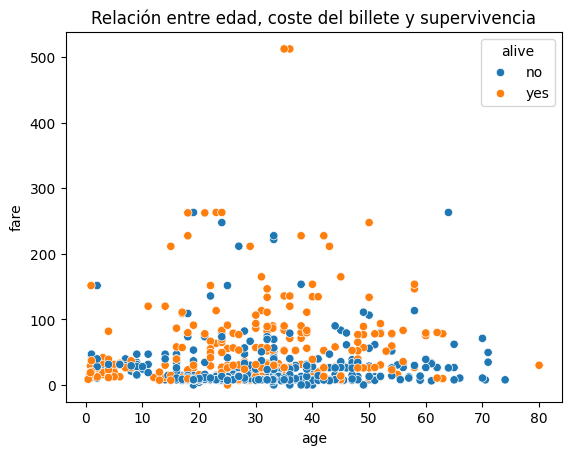

In [23]:
#ejercicio 8
# Visualización de la relación entre edad, coste del billete y supervivencia
sns.scatterplot(x='age', y='fare', hue='alive', data=df_titanic)
plt.title('Relación entre edad, coste del billete y supervivencia')
plt.show()

Viendo el gráfico de dispersión y de forma general, vemos más puntos naranjas (supervivencia) en las edades más jovenes (entre 0 y 30 años) y los importes altos pagados (puntos altos sueltos) la mayoria también sobrevivieron. 

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [30]:
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")
df_air_jun

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23
...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23


In [36]:
aircompany_counts = df_air_jun['aircompany'].value_counts()
print(aircompany_counts)


aircompany
TabarAir      142
MoldaviAir    133
PamPangea     117
FlyQ          108
Airnar        100
Name: count, dtype: int64


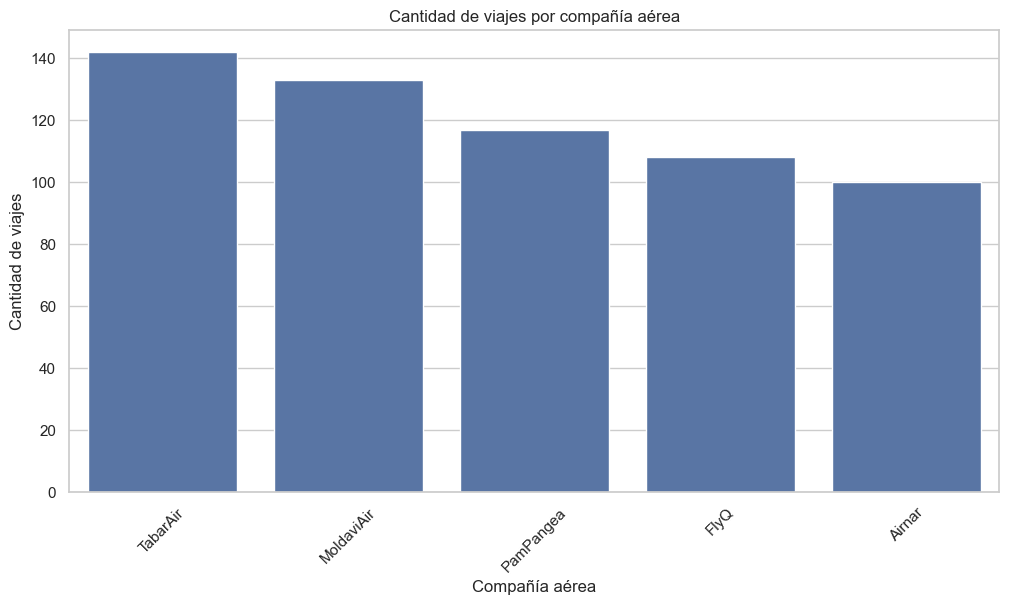

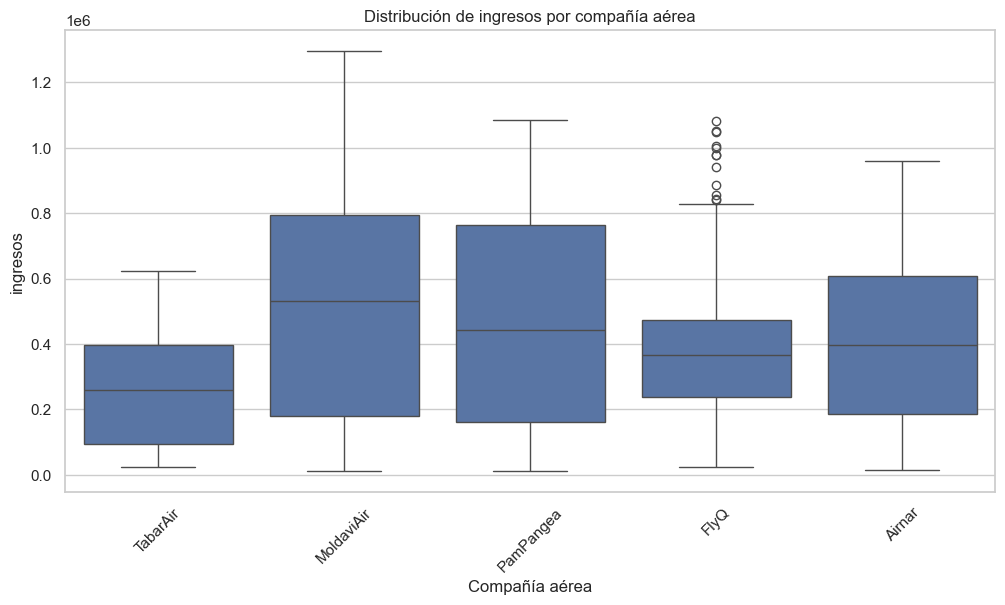

In [39]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Gráfico de barras de la cantidad de viajes por compañía aérea
plt.figure(figsize=(12, 6))
sns.countplot(data=df_air_jun, x='aircompany', order=df_air_jun['aircompany'].value_counts().index)
plt.title('Cantidad de viajes por compañía aérea')
plt.xlabel('Compañía aérea')
plt.ylabel('Cantidad de viajes')
plt.xticks(rotation=45)
plt.show()

# Gráfico de caja para mostrar la distribución de ingresos por compañía aérea
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_air_jun, x='aircompany', y='ingresos', order=df_air_jun['aircompany'].value_counts().index)
plt.title('Distribución de ingresos por compañía aérea')
plt.xlabel('Compañía aérea')
plt.ylabel('ingresos')
plt.xticks(rotation=45)
plt.show()

In [41]:
# Analizar estadísticas descriptivas de ingresos por compañía aérea
income_stats = df_air_jun.groupby('aircompany')['ingresos'].describe()
print(income_stats)

# Filtros para TabarAir
tabarair_data = df_air_jun[df_air_jun['aircompany'] == 'TabarAir']
print(tabarair_data.describe())

            count           mean            std       min          25%  \
aircompany                                                               
Airnar      100.0  405293.978200  269583.848420  14232.65  185270.6000   
FlyQ        108.0  401619.008056  295633.712828  23498.34  237556.9525   
MoldaviAir  133.0  548077.209098  374577.838426  11797.85  178872.9000   
PamPangea   117.0  478417.048718  364458.092328  12383.21  163124.5300   
TabarAir    142.0  271042.230282  177006.035877  24289.53   95620.5075   

                   50%          75%         max  
aircompany                                       
Airnar      396764.220  608356.1225   958617.02  
FlyQ        366970.685  473901.4325  1081702.91  
MoldaviAir  532426.220  794055.4100  1295515.83  
PamPangea   442668.520  763079.0200  1083591.01  
TabarAir    258379.745  398147.1925   623089.41  
          distancia     consumo_kg    duracion       ingresos
count    142.000000     142.000000  142.000000     142.000000
mean   

Respuesta analisis:
Viendo los datos de nuevo y sacando los datos que se sacaron en el workout era que tabarair era la compañia que hacia más vuelos pero en cuanto a la distribucion de sus ingresos vemos que es la que peor situada está. Como veiamos tambien en el workout, tabarair tiene disponibilidad de vuelos largos y de cortos pero seguramente el abuso de esos vuelos cortos es lo que hace que no sea una compañia del todo eficiente. 
En resumidas cuentas, tenemos que plantear cambios en la planificación de los vuelos que planteamos como empresa para que podamos ser más eficientes y tener unos ingresos mayores.

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


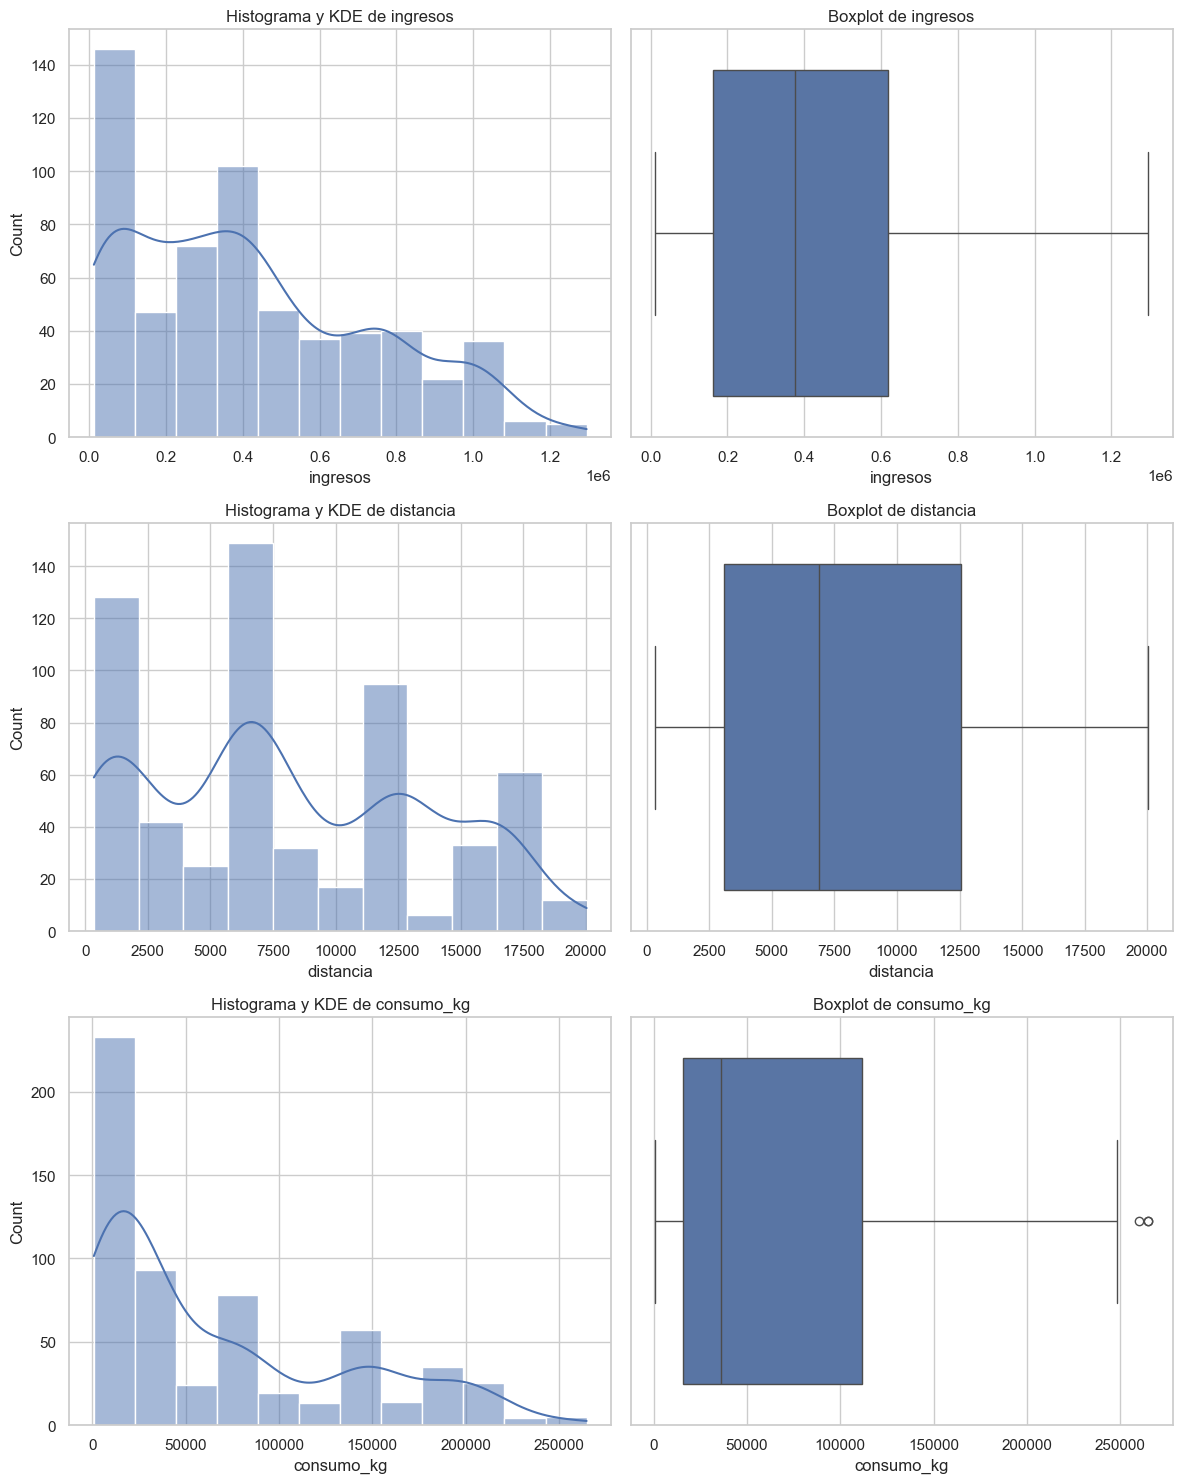

In [42]:
plot_combined_graphs(df_air_jun,["ingresos","distancia","consumo_kg"])

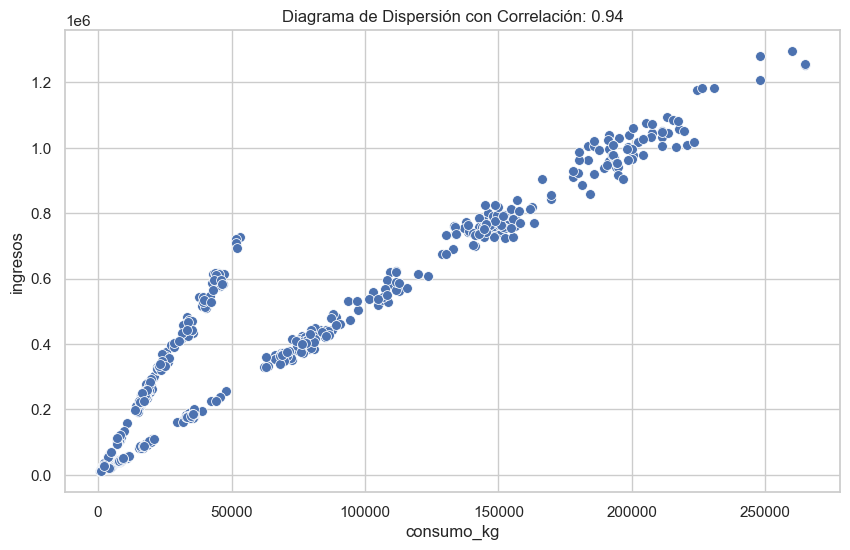

In [44]:
grafico_dispersion_con_correlacion(df_air_jun,"consumo_kg", "ingresos", mostrar_correlacion="False")

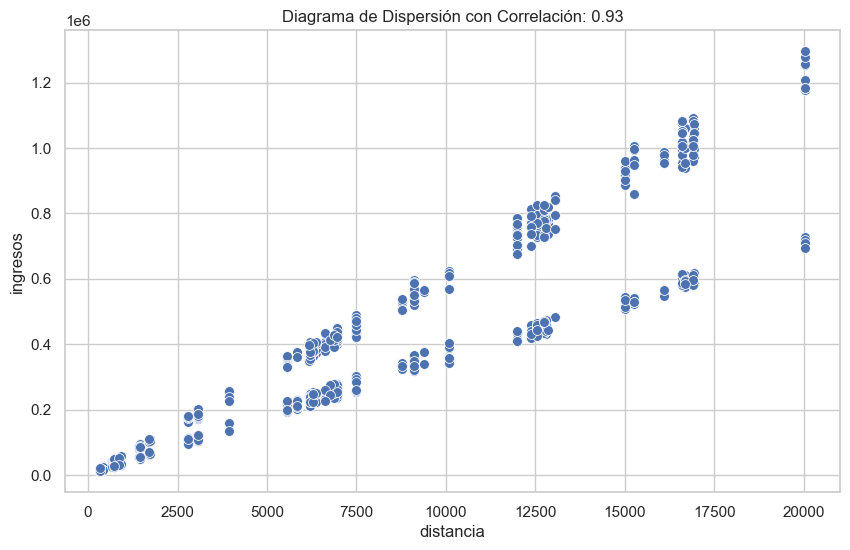

In [45]:
grafico_dispersion_con_correlacion(df_air_jun,"distancia", "ingresos", mostrar_correlacion="False")

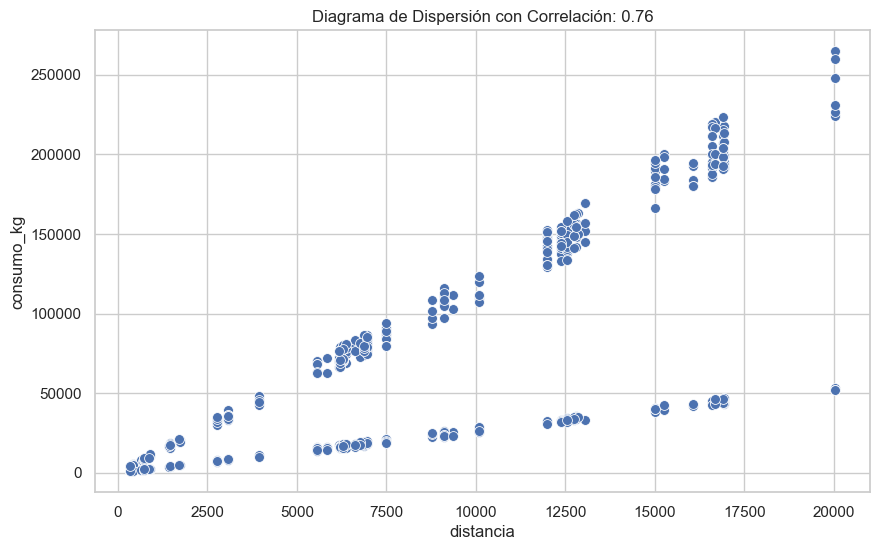

In [46]:
grafico_dispersion_con_correlacion(df_air_jun,"distancia", "consumo_kg", mostrar_correlacion="False")

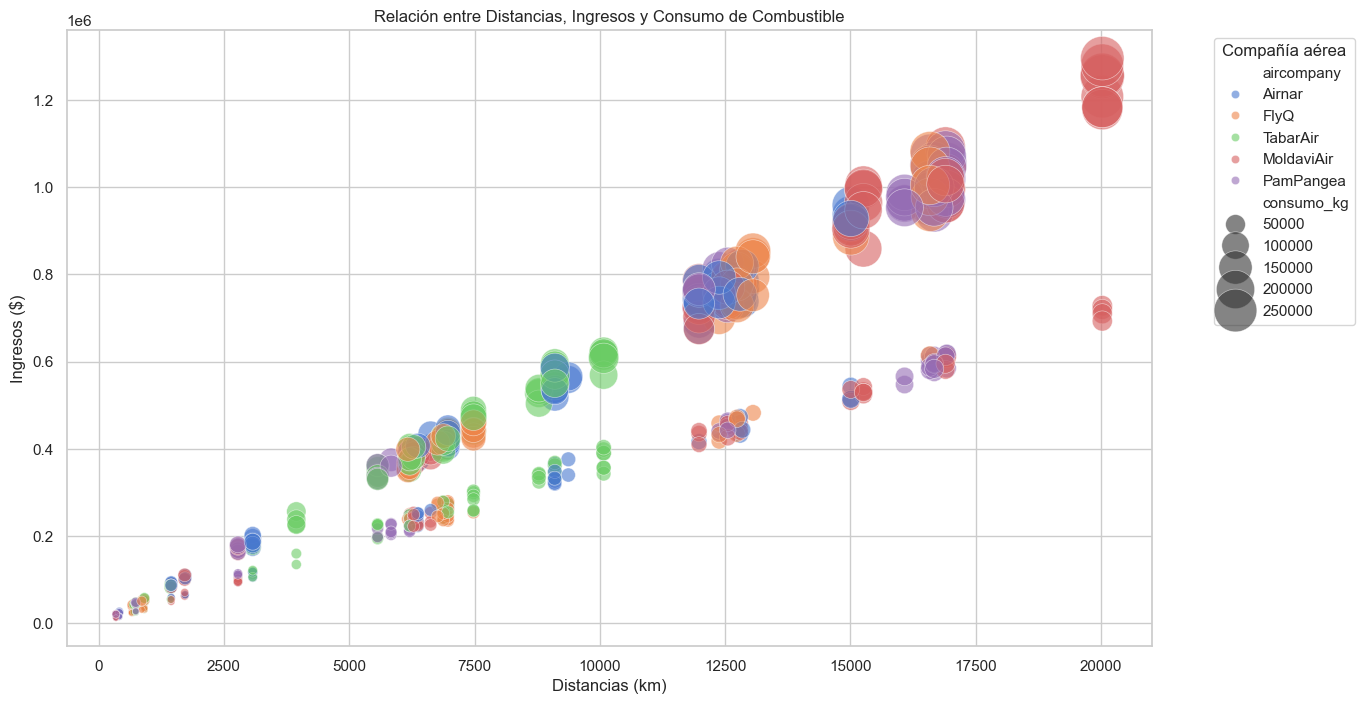

In [50]:
plt.figure(figsize=(14, 8))
bubble_plot = sns.scatterplot(
    data=df_air_jun,
    x='distancia',
    y='ingresos',
    size='consumo_kg',
    hue='aircompany',
    sizes=(20, 1000),  # Tamaño mínimo y máximo de las burbujas
    alpha=0.6,  # Transparencia de las burbujas
    palette="muted"  # Paleta de colores para las burbujas
)

# Añadir título y etiquetas
plt.title('Relación entre Distancias, Ingresos y Consumo de Combustible')
plt.xlabel('Distancias (km)')
plt.ylabel('Ingresos ($)')
plt.legend(title='Compañía aérea', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

Vemos que la linea de abajo sobre todo es la que más podria interesar ya que el tamaño de las bolitas (es decir el consumo de kg de queroseno) es menor y que por tanto seran vuelos más eficientes en cuanto a coste ya que la distancia la hacen igual. También me parece interesante que cuando ponemos tambien el color a las bolitas para saber de que compañia son esos vuelvos vemos que mayoritariamente a distancias largas vuelan moldaviAir y PamPangea. De hecho, parece destacable que los vuelos con mayor distancia (+20.000 km) son por parte solo de MoldaviAir y en algunos casos consiguen que sean vuelos muy eficientes por el consumo de kg de queroseno y en otros, la bola de consumo es bastante más grande.

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [52]:
#Creamos la nueva variable primero de todo categorizando con las distancias de corto, medio, largo, muy largo
bins = [0, 500, 1000, 2000, df_air_jun['distancia'].max()]
labels = ['Corto', 'Medio', 'Largo', 'Muy Largo']

df_air_jun['cat_vuelo'] = pd.cut(df_air_jun['distancia'], bins=bins, labels=labels, right=False)


,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23,Corto
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23,Muy Largo
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23,Muy Largo
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23,Muy Largo
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23,Muy Largo
...,...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23,Muy Largo
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23,Largo
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23,Muy Largo
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23,Muy Largo


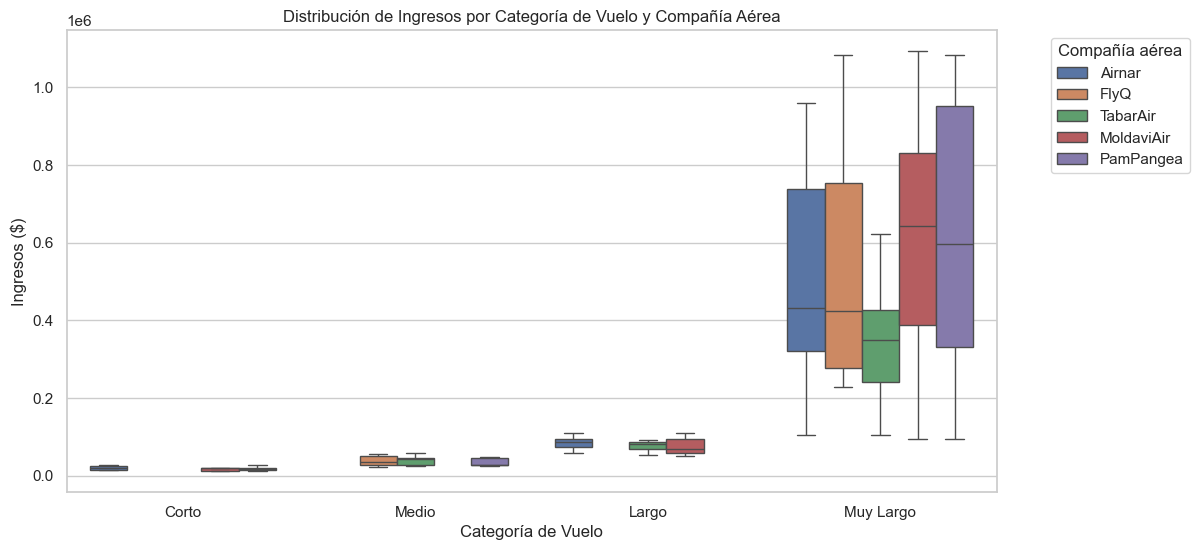

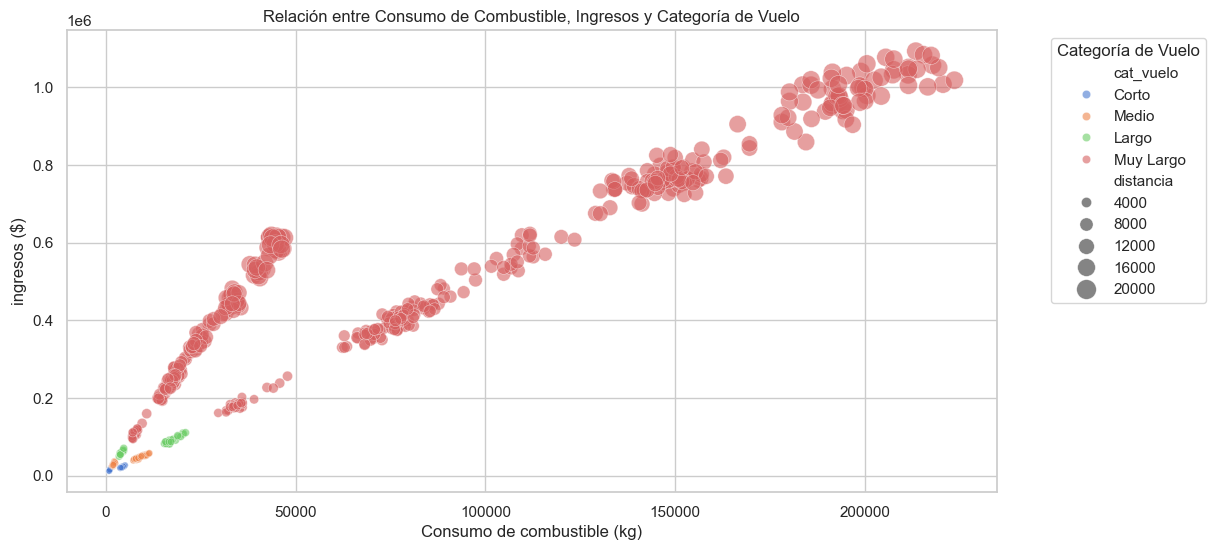

In [54]:
# Gráfico de caja para mostrar la distribución de ingresos por categoría de vuelo
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_air_jun, x='cat_vuelo', y='ingresos', hue='aircompany')
plt.title('Distribución de Ingresos por Categoría de Vuelo y Compañía Aérea')
plt.xlabel('Categoría de Vuelo')
plt.ylabel('Ingresos ($)')
plt.legend(title='Compañía aérea', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Gráfico de dispersión para mostrar la relación entre Consumo_kg e Ingresos por categoría de vuelo
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_air_jun, x='consumo_kg', y='ingresos', hue='cat_vuelo', size='distancia', sizes=(20, 200), alpha=0.6, palette='muted')
plt.title('Relación entre Consumo de Combustible, Ingresos y Categoría de Vuelo')
plt.xlabel('Consumo de combustible (kg)')
plt.ylabel('ingresos ($)')
plt.legend(title='Categoría de Vuelo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Ahora vemos como la gran mayoria de vuelos son de muy largo recorrido y que además la curva es más alta en cuanto al consumo. En ese sentido parece interesante entender ya la linea no es tan baja como antes veiamos con los ingresos bajos y consumo alto. 
En esta tabla se puede observar, al final, una normalidad más clara en la que si sube el consumo de kg tambien suben los ingresos recibidos y, por lo tanto, esos vuelos de mayor ingreso tambien pertenecen a los que más distancia recorren. 

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.